# Dataset Overview

### Source: Kaggle - Diabetes Health Indicators Dataset

This dataset comes from the CDC’s Behavioral Risk Factor Surveillance System (BRFSS). It includes over 250,000 survey responses with 22 features that describe health, lifestyle, and demographic indicators.

### Target Variable Y: diagnosed_diabetes

0 = No diabetes or only prediabetes
1 = Has diabetes


diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64


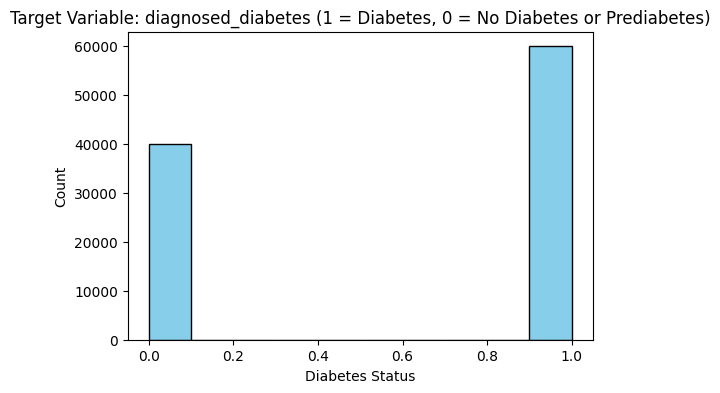

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("diabetes_dataset.csv")

# Confirm counts
print(df['diagnosed_diabetes'].value_counts())

# Plot the histogram
plt.figure(figsize=(6,4))
df['diagnosed_diabetes'].hist(color='skyblue', edgecolor='black')
plt.title("Target Variable: diagnosed_diabetes (1 = Diabetes, 0 = No Diabetes or Prediabetes)")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.grid(False)
plt.show()


### Independent Variable (x)

Chosen Feature : BMI (Body Mass Index)



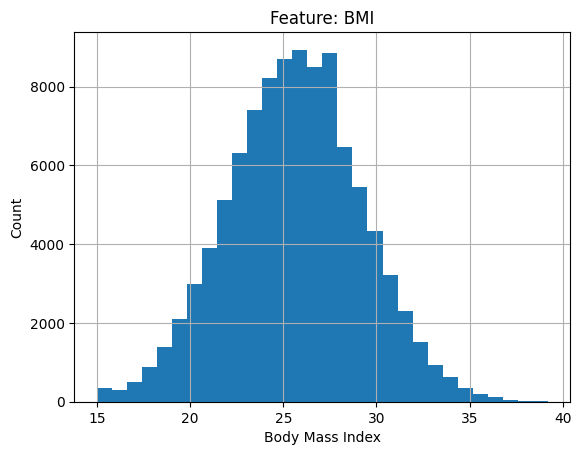

In [3]:
df['bmi'].hist(bins=30)
plt.title("Feature: BMI")
plt.xlabel("Body Mass Index")
plt.ylabel("Count")
plt.show()



### Proposed Transformation

#### Transformation Name:
Convert BMI (continuous) → BMI Category (categorical)

#### How:
Group BMI values into standard weight categories.
| **BMI Range** | **Category** |
|----------------|--------------|
| < 18.5 | Underweight |
| 18.5 – 24.9 | Normal |
| 25 – 29.9 | Overweight |
| ≥ 30 | Obese |

In [5]:
bins = [0, 18.5, 25, 30, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)


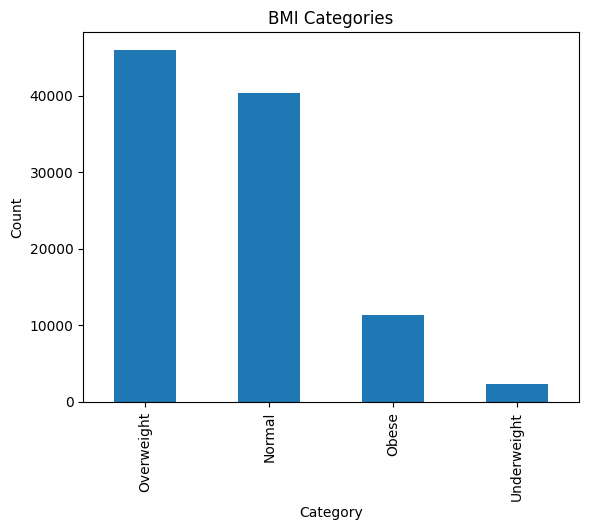

In [6]:
df['BMI_Category'].value_counts().plot(kind='bar')
plt.title("BMI Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


In [10]:
df['diagnosed_diabetes'] = 1 - df['diagnosed_diabetes']


In [9]:
df['diagnosed_diabetes'].value_counts(normalize=True)


diagnosed_diabetes
1    0.59998
0    0.40002
Name: proportion, dtype: float64